# 2 Galeano, Joseph & Lillo (2015)

# 3

### 3.b.2 


_Berrendero, J. R., Justel, A., & Svarc, M. (2011)_

Sean los p procesos, cada uno en el **mismo intervalo T**:

$$\chi_1, \dots, \chi_p$$

Note que al tomar el punto $t\in T$, se tiene un vector:

$$\chi_1(t) = [X_{11}(t), \dots, X_{1n}(t)]^T$$ 

Por ellos se define la matriz 

$$\begin{bmatrix}\chi_1(t) | \chi_2(t) | \dots | \chi_p(t)\end{bmatrix}$$ 

Y se toman la matriz de covarianza de la matriz anterior, la cual se denota como:

$$\Sigma(t) = \begin{bmatrix} \Sigma_{11}(t) & \Sigma_{12}(t) & \dots & \Sigma_{1p}(t) \\ \Sigma_{21}(t) & \Sigma_{22}(t) & \dots & \Sigma_{2p}(t) \\ \vdots & \vdots & \ddots & \vdots \\ \Sigma_{p1}(t) & \Sigma_{p2}(t) & \dots & \Sigma_{pp}(t) \end{bmatrix}$$

Pero tomando todos los puntos, se tiene la sucesión de matrices de covarianza:

$$\Sigma_1, \Sigma_2, \dots, \Sigma_T$$

Tomando los valores propios y vectores propios de cada matriz de covarianza, se tiene que para cada $t\in T$:

$$\Sigma_t = \lambda(t) V_t $$

Donde $\lambda(t)$ es una **función** y loz vectores $V_t$ son dependientes de $t$. La idea es unir los vectores en un vector de funciones.


Cual multiplo de los vectores propios es vector propio, es decir, si $V_t$ es vector propio, entonces $cV_t$ también lo es, mostrando que al ser multiplicado **por un c negativo cambia de dirección**, haciendo que no sea unico.

Medida de varianza explicada para toda la parte del proceso para que no hayas problemas.


# 4 Imagenes

Se puede realizar la descomposición 

$$\chi(i, j) = \sum_{k = 1}^{\infty} c_k u_k(j, l)$$

Tal que la función base se puede definir como:
$$u_k(j, l) =u_k(j) u_k(l)$$

In [4]:
import rpy2

In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%%R
install.packages(c("funData", "MFPCA", "orthopolynom"))
# install.packages("orthopolynom")

* installing *source* package ‘funData’ ...
** package ‘funData’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading


Creating a new generic function for ‘integrate’ in package ‘funData’
Creating a generic function for ‘norm’ from package ‘base’ in package ‘funData’


** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (funData)
* installing *source* package ‘orthopolynom’ ...
** package ‘orthopolynom’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (orthopolynom)
ERROR: failed to lock directory ‘/usr/local/lib/R/site-library’ for modifying
Try removing ‘/usr/local/lib/R/site-library/00LOCK-MFPCA’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
probando la URL 'https://cloud.r-project.org/src/contrib/funData_1.3-9.tar.gz'
Content type 'application/x-gzip' length 112619 bytes (109 KB)
downloaded 109 KB

probando la URL 'https://cloud.r-project.org/src/contrib/MFPCA_1.3-10.tar.gz'
Content type 'application/x-gzip' length 115212 bytes (112 KB)
downloaded 112 KB

probando la URL 'https://cloud.r-project.org/src/contrib/orthopolynom_1.0-6.1.tar.gz'
Content type 'application/x-gzip' length 33419 bytes (32 KB)
downloaded 32 KB


The downloaded source packages are in
	‘/tmp/Rtmppnj2jo/downloaded_packages’
Además: Aviso:
In install.packages(c("funData", "MFPCA", "orthopolynom")) :
  installation of package ‘MFPCA’ had non-zero exit status


### 4.a.1 Genere el proceso multidimensional constituido por imágenes y curvas.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre

def generar_datos_simulados(M=25, N=10, alpha_range=(0.2, 0.8), S1_x=100, S1_y=50, S2=200, seed=42):
    """
    Genera datos simulados de imágenes y curvas.
    
    Parámetros:
    - M: Número de componentes principales
    - N: Número de imágenes y curvas a simular
    - alpha_range: Rango para el parámetro alpha (tuple)
    - S1_x, S1_y: Dimensiones de la grilla para imágenes
    - S2: Tamaño de la grilla para funciones
    - seed: Semilla para reproducibilidad
    
    Retorna:
    - Dictionary con arrays de imágenes y curvas simuladas
    """
    # Configuración de la grilla
    t1_x = np.linspace(0, 1, S1_x)
    t1_y = np.linspace(0, 0.5, S1_y)
    t2 = np.linspace(-1, 1, S2)
    X, Y = np.meshgrid(t1_x, t1_y)
    
    # Funciones base
    def fourier_basis(m, x, y):
        return np.sin((m + 1) * np.pi * x) * np.cos((m + 1) * np.pi * y)
    
    def legendre_basis(m, x):
        return eval_legendre(m, x)
    
    # Inicialización
    np.random.seed(seed)
    all_images = []
    all_curves = []
    
    # Generación de datos
    for _ in range(N):
        images = []
        curves = []
        eigenvalues = np.exp(-np.arange(1, M + 1))
        
        for m in range(M):
            alpha = np.random.uniform(*alpha_range)
            weight1 = np.sqrt(alpha)
            weight2 = np.sqrt(1 - alpha)
            
            psi1 = weight1 * fourier_basis(m, X, Y)
            psi2 = weight2 * legendre_basis(m, t2)
            
            images.append(eigenvalues[m] * psi1)
            curves.append(eigenvalues[m] * psi2)
        
        image_final = np.sum(images, axis=0)
        curve_final = np.sum(curves, axis=0)
        
        all_images.append(image_final)
        all_curves.append(curve_final)
    
    return {
        "images": np.array(all_images),
        "curves": np.array(all_curves),
        "t1_x": t1_x,
        "t1_y": t1_y,
        "t2": t2
    }

def visualizar_resultados(datos_simulados):
    """
    Visualiza las imágenes y curvas simuladas.
    
    Parámetros:
    - datos_simulados: Dictionary con los datos generados por generar_datos_simulados()
    """
    N = len(datos_simulados["images"])
    fig, axes = plt.subplots(N, 2, figsize=(12, 5 * N))
    
    for i in range(N):
        # Visualización de imagen
        axes[i, 0].imshow(
            datos_simulados["images"][i],
            extent=[0, 1, 0, 0.5],
            aspect='auto',
            cmap='coolwarm'
        )
        axes[i, 0].set_title(f"Imagen Simulada {i+1}")
        axes[i, 0].set_xlabel("T1_x")
        axes[i, 0].set_ylabel("T1_y")
        
        # Visualización de curva
        axes[i, 1].plot(
            datos_simulados["t2"],
            datos_simulados["curves"][i],
            label=f"Curva Simulada {i+1}"
        )
        axes[i, 1].set_title(f"Curva Simulada {i+1}")
        axes[i, 1].set_xlabel("T2")
        axes[i, 1].set_ylabel("Amplitud")
        axes[i, 1].legend()
    
    plt.tight_layout()
    plt.show()

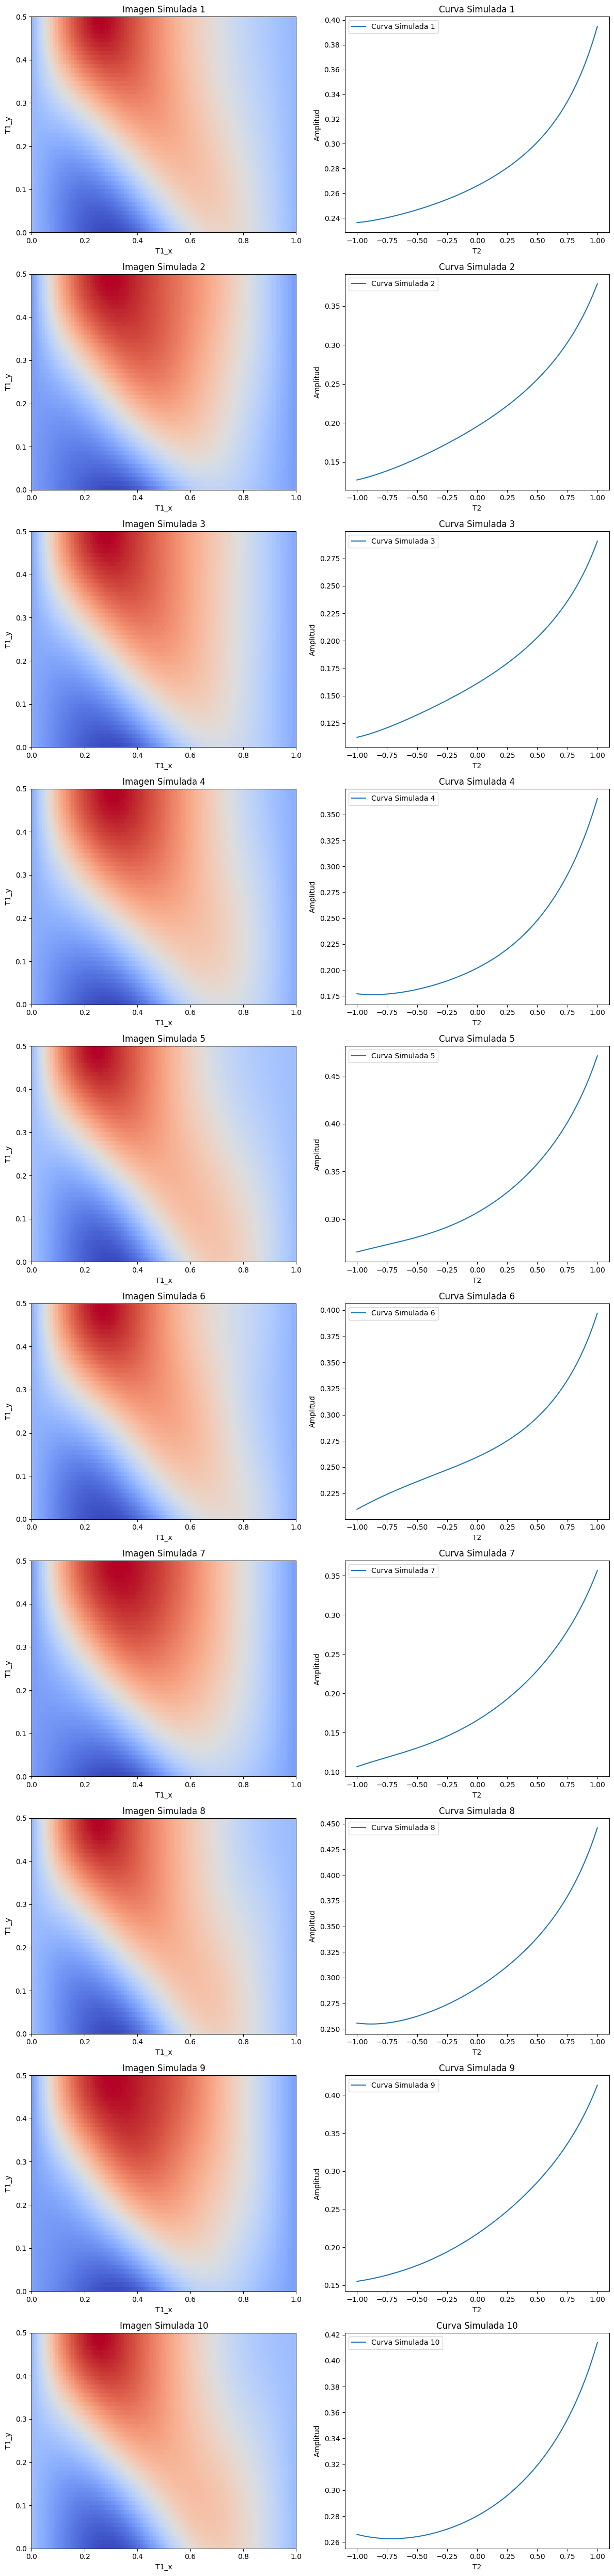

In [5]:
# Generar datos
datos = generar_datos_simulados()
    
# Visualizar resultados
visualizar_resultados(datos)

### 4.a.2 Usando el artículo de Rousseeuw, P. J., Raymaekers, J., & Hubert, M. (2018), encuentre imágenes outliers y retírelas del dataset.

**The main idea is to split the sample into two half samples, and then to apply a robust scale estimator to each of them.**

---
Se separa el conjunto de datos en dos grupos partiendo en 
$$ h = \frac{n + 1}{2}$$ 

entonces se define en caso **par**,


$$Y_b = \{y_{1}, \dots, y_h\}$$
$$Y_a = \{y_{h+1}, \dots, y_n\}$$

en caso **impar**,


$$Y_b = \{y_{1}, \dots, y_h\}$$
$$Y_a = \{y_{h}, \dots, y_n\}$$

---
Sea la estimación inicial

$$ S_{0, a}(Y) = \frac{med(Z_a)}{\phi^{-1}(0.75)}$$
$$ S_{0, b}(Y) = \frac{med(Z_b)}{\phi^{-1}(0.75)}$$

Donde $Z_a = Y_a - med(Y)$ y $Z_b = med(Y) - Y_b$ y donde $\phi^{-1}(0.75)$ asegura "consistensy" en una gaussiana.

El primer paso de M-estimación son dados por,

$$ S_a (Y) = S_{0, a}(Y) \sqrt{\frac{1}{2\alpha h} \sum_{z_i \in Z_a} \rho_c\left(\frac{z_i}{S_{0, a}(Y)}\right) }$$

$$ S_b (Y) = S_{0, b}(Y) \sqrt{\frac{1}{2\alpha h} \sum_{z_i \in Z_b} \rho_c\left(\frac{z_i}{S_{0, b}(Y)}\right) }$$

Donde, $ h = \left\lfloor\frac{n+1}{2}\right\rfloor$,  $\alpha = \int_0^{\infty} \rho_c(x)d\Phi(x)$.$\rho_c$ La funcion de hubert de escala y $\rho_c(t) = \left(\frac{t}{c}\right)^2\mathbb{1}_{[-c,c]} + \mathbb{1}_{(-\infty,-c]\cup[c,\infty)}$


---
$$
\text{DO}(y; Y) = 
\begin{cases}
\frac{y-\text{med}(Y)}{s_a(Y)} & \text{if } y \geq \text{med}(Y) \\
\frac{\text{med}(Y)-y}{s_b(Y)} & \text{if } y \leq \text{med}(Y)
\end{cases}
$$

Se puede definir *functional directional outlyingness* (fDO) de X, con respecto a una muestra **Y** como,

$$
\text{fDO}(X; Y) = \sum^T_{j=1} DO(X(t_j); Y(t_j)) W(t_j)
$$

Donde $W(.)$ es una función de peso, tal que  $\sum^T_{j=1} W(t_j) = 1$.

Se considera que $DO_i$ tiene una distribución de cola a la derecha, entonces transformando

$$ \{ LDO_1, \dots, LDO_n\} = \{ log(0.1 + DO_1), \dots, log(0.1 + DO_n)\}$$

Se **aproxima** la distribución de $LDO_i$ a una normal, y se obtiene el valor de corte como,

$$\frac{LDO_i - med(LDO)}{MAD(LDO)} < \Phi^{-1}(0.995)$$

---

Se puede encontrar la variabilidad de los valores $DO_i$ como,

$$
vDO(y_i, Y) =\frac{stdev_j(DO(Y_i(t_j); Y(t_j)))}{1 + fDO(Y_i; Y)}
$$

Con lo anterior definido se puede encontrar el **FOM** (*functional outlier map*) como,

$$
(\text{fDO}(Y_i, \mathbf{Y}), \text{vDO}(Y_i, \mathbf{Y}))$$

Se puede definir *combined functional outlyingness* (CFO) de una función $Y_i$ como,

$$
CFO_i  = \sqrt{\left(\frac{\text{fDO}_i}{med(\text{fDO})}\right)^2 + \left(\frac{\text{vDO}_i}{med(\text{vDO})}\right)^2}

**APLICACIÓN A IMAGENES**

$$
\text{fDO}(Y_i; \mathbf{Y}) = \sum^J_{j=1}\sum^K_{k=1} DO(Y_i(j,k); \mathbf{Y}(j,k)) W_{jk}
$$
$$
\text{vDO}(Y_i; \mathbf{Y}) =\frac{stdev_{j,k}(DO(Y_i(j,k); \mathbf{Y}(j,k)))}{1 + fDO(Y_i; \mathbf{Y})}
$$

Y se toma los pesos tal que
$$
W_{j,k} = \frac{1}{(JK)}
$$

En este caso en especial, se toma 10x100x50

$$
\text{fDO}(Y_i; \mathbf{Y}) = \frac{1}{100 \times 50}\sum^{100}_{j=1}\sum^{50}_{k=1} DO(Y_i(j,k); \mathbf{Y}(j,k)) W_{jk}
$$



**Si se puede, no usar supuesto de normalidad.**